In [1]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np;
import pandas as pd;
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
import statistics as stat

from scipy import special, optimize

---
---
# Fit viscosity measurements

In [2]:
filename = "./experimentdata.csv";
df_data = pd.read_csv(filename, sep=',');
display(df_data)

,Shear rate 1/s,Viscosity Pa.s
0,0.031416,3376.020000
1,0.062832,3296.920000
2,0.125664,3150.910000
3,0.251328,3010.330000
4,0.376992,2853.870000
5,0.502656,2730.730000
6,0.628320,2687.770000
7,1.256640,2374.960000
8,2.513280,2069.760000
9,3.769920,1826.350000


### Cross
### $$ \frac{\eta - b}{a - b} = \frac{1}{1 + (c \dot{\gamma})^d} $$
### $$ \eta = \frac{a - b}{1 + (c \dot{\gamma})^d} + b $$

### where:
$a =$ zero rate viscosity <br>
$b =$ infinite rate viscosity <br>
$c =$ consistency <br>
$d =$ rate index

In [3]:
def Cross_(gamma, eta_zero, eta_inft, kappa, n):
    a = eta_zero;
    b = eta_inft;
    c = kappa;
    d = n;
    
    nume = a - b;
    deno = 1 + (c*gamma)**d;
    
    return (nume/deno) + b;

### The Carreau-Yasuda Model [1]
### $$ \frac{\eta - b}{a - b} = \frac{1}{\left[1 + \left(c \dot{\gamma}\right)^e\right]^{\frac{1 - d}{e}}} $$
### $$ \frac{\eta - \eta_{\infty}}{\eta_0 - \eta_{\infty}} = \frac{1}{\left[1 + \left(\kappa \dot{\gamma}\right)^a\right]^{\frac{(1 - n)}{a}}} $$
### $$ \eta = \frac{\eta_0 - \eta_{\infty}}{\left[1 + \left(\kappa \dot{\gamma}\right)^a\right]^{\frac{(1 - n)}{a}}} + \eta_{\infty} $$

### where:
$\eta =$ Viscosity <br>
$\dot{\gamma} =$ Shear rate <br>
$\eta_{\infty} =$ Infinite shear rate viscosity <br>
$\eta_0 =$ Zero shear rate viscosity <br>
$\kappa =$ Time constant <br>
$n =$ The Power Law index <br>
$a =$ The width of the transition region between the zero shear viscosity and the Power Law region

#### [1] Osswald, T., Rudolph, N., Osswald, T., & Rudolph, N. (2014). Generalized Newtonian Fluid (GNF) Models. Polymer Rheology, 59–99. https://doi.org/10.3139/9781569905234.003

In [4]:
def CarreauYasuda_(gamma, eta_zero, eta_inft, kappa, n, m):
    a = eta_zero;
    b = eta_inft;
    c = kappa;
    d = n;
    e = m;
    
    nume = a - b;
    
    base = 1 + (c*gamma)**e;
    expo = (1 - d)/e;
    deno = base**expo;
    
    return (nume/deno) + b;

---
## Compute fitting curve with the Carreau-Yasuda model

In [5]:
# plot fitting
gamma    = np.logspace(-3, 5, 100)
eta_zero = 3679
eta_inft = 5.25439
kappa    = 0.0379711
n        = 0.127674
m        = 0.446226

df = pd.DataFrame()
df['Shear rate fit'] = pd.Series(gamma)
df['Viscosity fit'] = pd.Series(CarreauYasuda_(gamma, eta_zero, eta_inft, kappa, n, m))

display(df)

,Shear rate fit,Viscosity fit
0,0.001000,3603.685768
1,0.001205,3597.275638
2,0.001451,3590.330115
3,0.001748,3582.806287
4,0.002105,3574.658127
...,...,...
95,47508.101621,10.211429
96,57223.676594,9.491179
97,68926.121043,8.874096
98,83021.756813,8.345716


---
## Plot data and fitted curves

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

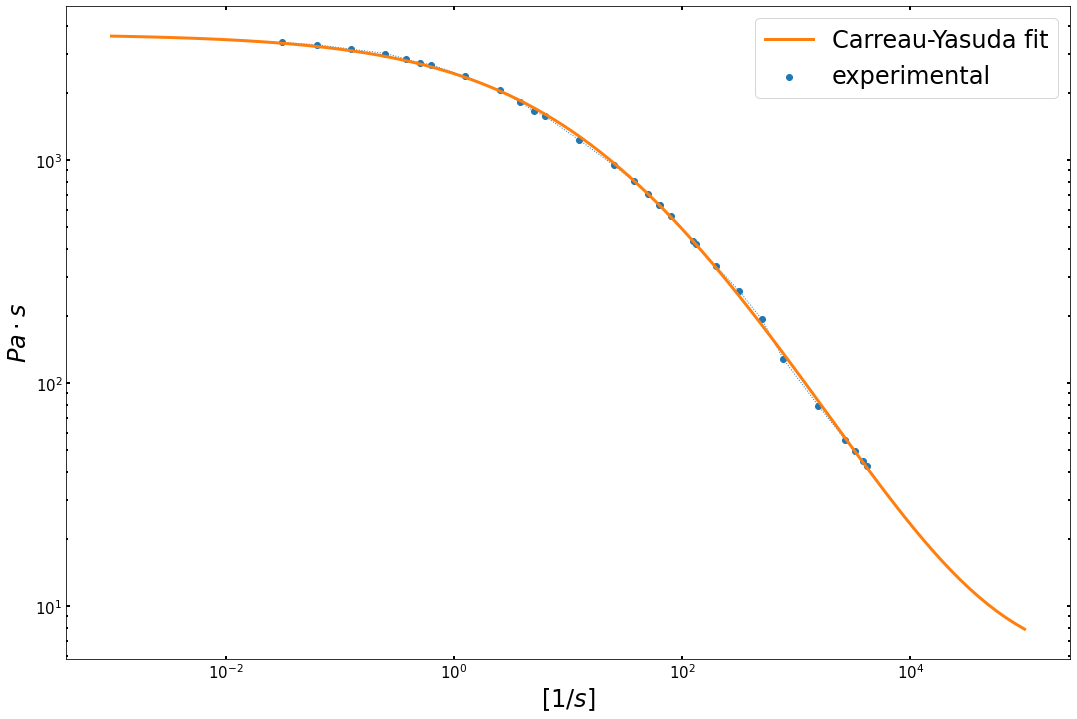

In [6]:
# Draw plot canvas
plotname = "Experiment Data"
scale = 6
plt.subplots(figsize=(3*scale, 2*scale))
ax0 = plt.gca()

# plot dataset
x = pd.Series(df_data['Shear rate 1/s']).dropna()
y = pd.Series(df_data['Viscosity Pa.s']).dropna()
plt.scatter(x, y, label='experimental')
plt.plot(x, y, linewidth=1, linestyle=':')

# plot fitting
x_fit = df['Shear rate fit']
y_fit = df['Viscosity fit']
plt.plot(x_fit, y_fit, linewidth=3, label='Carreau-Yasuda fit');

# Format and Display plots
ax0.tick_params(which='both', direction='in', width=2, bottom=True, top=True, left=True, right=True);
plt.yscale('log');
plt.xscale('log');
plt.xlabel(r'$[1/s]$', fontsize=24);
plt.ylabel(r'$Pa \cdot s$', fontsize=24);
#plt.title(plotname, size=24);
plt.legend(prop={'size': 24});
plt.savefig('plt_' + plotname + '.png', dpi=300, bbox_inches='tight');
display(plt);
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
# Shear viscosity as a function of a given shear rate $\dot{\gamma}_o$
# $$ \eta (t, \dot{\gamma}_o) = f_1 \sum_{1=1}^{n} \frac{a_i}{{\alpha_i}^2} \left( 1 - e^{1 - \alpha_i t} (1 - \dot{\gamma}_o n_1 \lambda_i \alpha_i t) \right) +
                                f_2 \sum_{1=1}^{n} \frac{a_i}{{\beta_i}^2}  \left( 1 - e^{1 - \beta_i  t} (1 - \dot{\gamma}_o n_2 \lambda_i \beta_i  t) \right) $$
 
### where:
### $$ f_2 = 1 - f_1 $$
### $$ \alpha_i = \frac{1 + n_1 \lambda_i \dot{\gamma}_o}{\lambda_i} $$
### $$ \beta_i  = \frac{1 + n_2 \lambda_i \dot{\gamma}_o}{\lambda_i} $$
### $\eta (t, \dot{\gamma}_o) =$ shear viscosity
### $t =$ time
### $\dot{\gamma}_o =$ shear rate
### $a_i =$ the $i^{th}$ elastic value of the Maxwell element
### $\lambda_i =$ the $i^{th}$ characteristic time of the Maxwell element
### $f_1, f_2, n_1, n_2$ are fitting parameters

In [7]:
dot_gamma_o = 1 # make it global

# Let's model with 8 Maxwell elements
def _eta_gamma(t, *p):
    a_          = p[0:8]
    lambda_     = p[8:16]
    f_1         = p[16]
    f_2         = 1 - f_1
    n_1         = p[17]
    n_2         = p[18]
    
    sum_1 = 0
    for i in range(0, 8, 1):
        alpha = _alpha(n_1, lambda_[i], dot_gamma_o)
        frac = a_[i] / alpha**2
        expo = np.exp(- alpha*t)
        prod = dot_gamma_o*n_1*lambda_[i]*alpha*t
        res_1 = frac*(1 - expo * (1 - prod))
        sum_1 = sum_1 + res_1
        
    sum_2 = 0
    for i in range(0, 8, 1):
        beta  = _beta(n_2, lambda_[i], dot_gamma_o)
        frac = a_[i] / beta**2
        expo = np.exp(- beta*t)
        prod = dot_gamma_o*n_2*lambda_[i]*beta*t
        res_2 = frac*(1 - expo * (1 - prod))
        sum_2 = sum_2 + res_2
    
    res = (f_1 * sum_1) + (f_2 * sum_2)
    
    return res / 10

def _alpha(n_1, lambda_, dot_gamma_o):
    nume = 1 + n_1*lambda_*dot_gamma_o
    deno = lambda_
    res = nume / deno
    return res

def _beta(n_2, lambda_, dot_gamma_o):
    nume = 1 + n_2*lambda_*dot_gamma_o
    deno = lambda_
    res = nume / deno
    return res

# The Wagner model gives the shear viscosity vs. time of a single shear rate ...
## now let's caculate the steady state shear viscocity at several shear rates at $t = \infty$

In [8]:
def _all_etas(gamma, *p):
    res = pd.Series()
    for shearRate in gamma:
        global dot_gamma_o
        dot_gamma_o = shearRate
        eta_gamma = _eta_gamma(gamma, *p)
        eta_steady = eta_gamma[len(eta_gamma)-1]
        res = res.append(pd.Series([eta_steady]))
    return res
    
#gamma = pd.Series(df_data['Shear rate 1/s']).dropna()
#print(_all_etas(gamma, *p))

---
## Compute fitting curve with the Wagner model (and plot)

In [36]:
def _eta(t, eta, plotname):
    
    # Draw plot canvas
    scale = 6;
    plt.subplots(figsize=(3*scale, 2*scale));
    ax0 = plt.gca()
    
    # plot dataset
    plt.scatter(t, eta, label='experimental')
    plt.plot(t, eta, linewidth=1, linestyle=':')
    
    # Initial guess
    ai      = [0.0000006, 0.0003, 0.28, 30, 10000, 2000000, 40000000, 200000000]
    lambdai = [3000, 600, 100, 10, 1, 0.1, 0.01, 0.001]
    f1 = [0.57]
    n1 = [2.8]
    n2 = [0.07]
    p = ai + lambdai + f1 + n1 + n2
    
    # Fit the model
    upbound    = [np.inf]*16 + [1] + [np.inf]*2
    model      = optimize.curve_fit(_all_etas, t, eta, p, bounds=(0, upbound)); #bounds=(0, [3., 1., 0.5])
    parameters = model[0]

    # Show the fitting parameters
    print(parameters)
    
    # Plot fit
    eta_fit = _all_etas(t, *parameters)
    plt.plot(t, eta_fit, linewidth=3, label = 'Wagner fit' + '\n' +
             r'$f_1 = $' + str(round(parameters[16],2)) + '\n' +
             r'$n_1 = $' + str(round(parameters[17],2)) + '\n' +
             r'$n_2 = $' + str(round(parameters[18],2)));

    # Format and Display plots
    ax0.tick_params(which='both', direction='in', width=2, bottom=True, top=True, left=True, right=True);
    plt.yscale('log');
    plt.xscale('log');
    plt.xlabel(r'$t$', fontsize=24);
    plt.ylabel(r'$G(t)$', fontsize=24);
    #plt.title(plotname, size=24);
    plt.legend(prop={'size': 24});
    plt.savefig('plt_' + plotname + '.png', dpi=300, bbox_inches='tight');
    display(plt);
    mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

[4.72744511e-07 2.33505700e-04 2.02973585e-01 5.06508213e+01
 1.01060946e+04 1.90376327e+06 2.72974474e+07 2.01070120e+08
 2.37147696e+03 4.72284821e+02 7.53066964e+01 1.47760061e-01
 1.01214544e+00 9.59188716e-02 1.35530798e-02 3.05963724e-03
 6.09344945e-01 2.22523129e+00 8.43179883e-02]


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

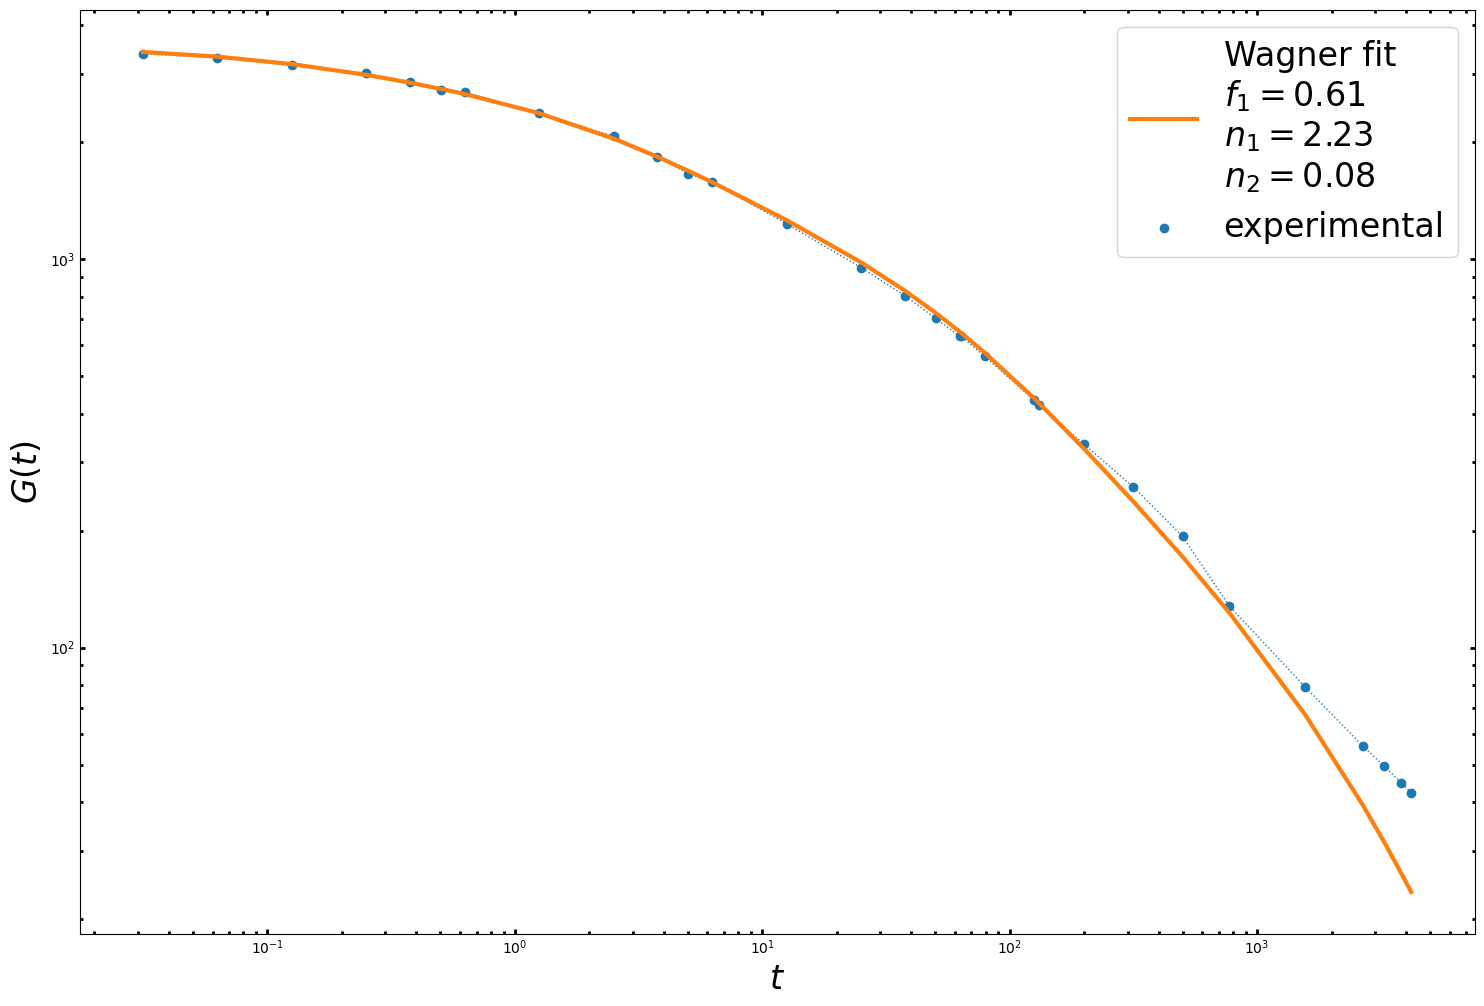

In [37]:
_eta(
    pd.Series(df_data['Shear rate 1/s']).dropna(),
    pd.Series(df_data['Viscosity Pa.s']).dropna(),
    "Wagner fit")

---
# PlayGround Cell

0        7.985329
1       71.636437
2      131.458189
3      184.863895
4      234.025973
         ...     
60    3625.601661
61    3625.601627
62    3625.601612
63    3625.601606
64    3625.601603
Length: 65, dtype: float64

3625.6016033150036


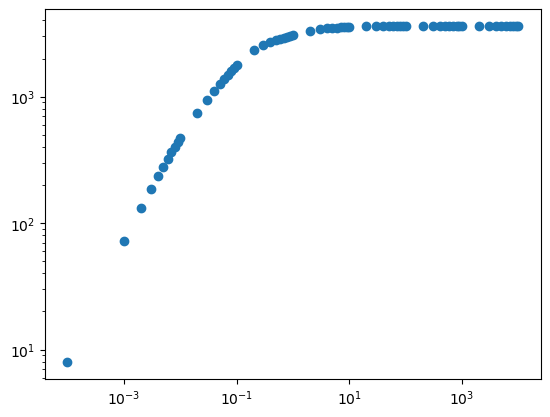

In [11]:
t       = pd.Series([0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
ai      = [0.00000006, 0.00003, 0.028, 30, 10000, 2000000, 40000000, 200000000]
lambdai = [3000, 600, 100, 10, 1, 0.1, 0.01, 0.001]
f1 = [0.57]
n1 = [2.8]
n2 = [0.07]

p = ai + lambdai + f1 + n1 + n2

dot_gamma_o = 0.01 # make it global
eta_gamma = _eta_gamma(t, *p)
eta_steady = eta_gamma[len(eta_gamma)-1]
display(eta_gamma)
print(eta_steady)

plt.scatter(t, eta_gamma)
plt.yscale('log')
plt.xscale('log')